In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [2]:
app = Flask(__name__)

In [3]:
playstore = pd.read_csv('./data/googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playstore.drop_duplicates(subset = "App", inplace=True) 

In [5]:
playstore.drop([10472], inplace=True)

In [6]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
playstore.Category = playstore.Category.astype('category')

In [8]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("+",""))

In [9]:
playstore.Installs = playstore.Installs.astype("int64")

In [10]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [11]:
playstore.Price = playstore.Price.apply(lambda x: x.replace("$",""))
playstore.Price = playstore.Price.astype("float64")


In [12]:
playstore[["Reviews", "Size", "Installs"]] = playstore[["Reviews", "Size", "Installs"]].astype("int64")

In [13]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [14]:
df2 = playstore.copy()

In [15]:
top_category = pd.crosstab(index=df2.Category, columns='Jumlah').sort_values(by='Jumlah', ascending=False).reset_index()

In [16]:
pd.crosstab(index=df2.Category, columns='Jumlah').sort_values(by='Jumlah', ascending=False).reset_index()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [17]:
top_category

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [18]:
top_category.loc[0].Category

'FAMILY'

In [19]:
top_category.loc[0].Jumlah

1832

In [20]:
df2[["Category", "App", "Reviews", "Rating"]].groupby(["Category", "App"]).agg({'Reviews':'sum', 'Rating':'mean'}).sort_values(by="Reviews", ascending=False).head(10).reset_index()

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [21]:
stats = {
    # Ini adalah bagian untuk melengkapi konten value box 
    # most category mengambil nama category paling banyak mengacu pada dataframe top_category
    # total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe top_category
    'most_categories' : top_category.loc[0].Category,
    'total': top_category.loc[0].Jumlah,
    # rev_table adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna. 
    # Silahkan melakukan agregasi data yang tepat menggunakan groupby untuk menampilkan 10 aplikasi yang diurutkan berdasarkan 
    # jumlah Review pengguna. Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
    # Agregasi Anda dinilai benar jika hasilnya sama dengan tabel yang terlampir pada file ini
    'rev_table' : df2[["Category", "App", "Reviews", "Rating"]].groupby(["Category", "App"]).agg({'Reviews':'sum', 'Rating':'mean'}).sort_values(by="Reviews", ascending=False).head(10).reset_index().to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
}

In [22]:
cat_order = df2.groupby("Category").agg({
"Category" : "count"
    }).rename({'Category':'Total'}, axis=1).sort_values(by='Total', ascending=False).head()

In [23]:
cat_order.index

CategoricalIndex(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL'], categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', ...], ordered=False, name='Category', dtype='category')

In [24]:
cat_order.Total

Category
FAMILY      1832
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: Total, dtype: int64

<BarContainer object of 5 artists>

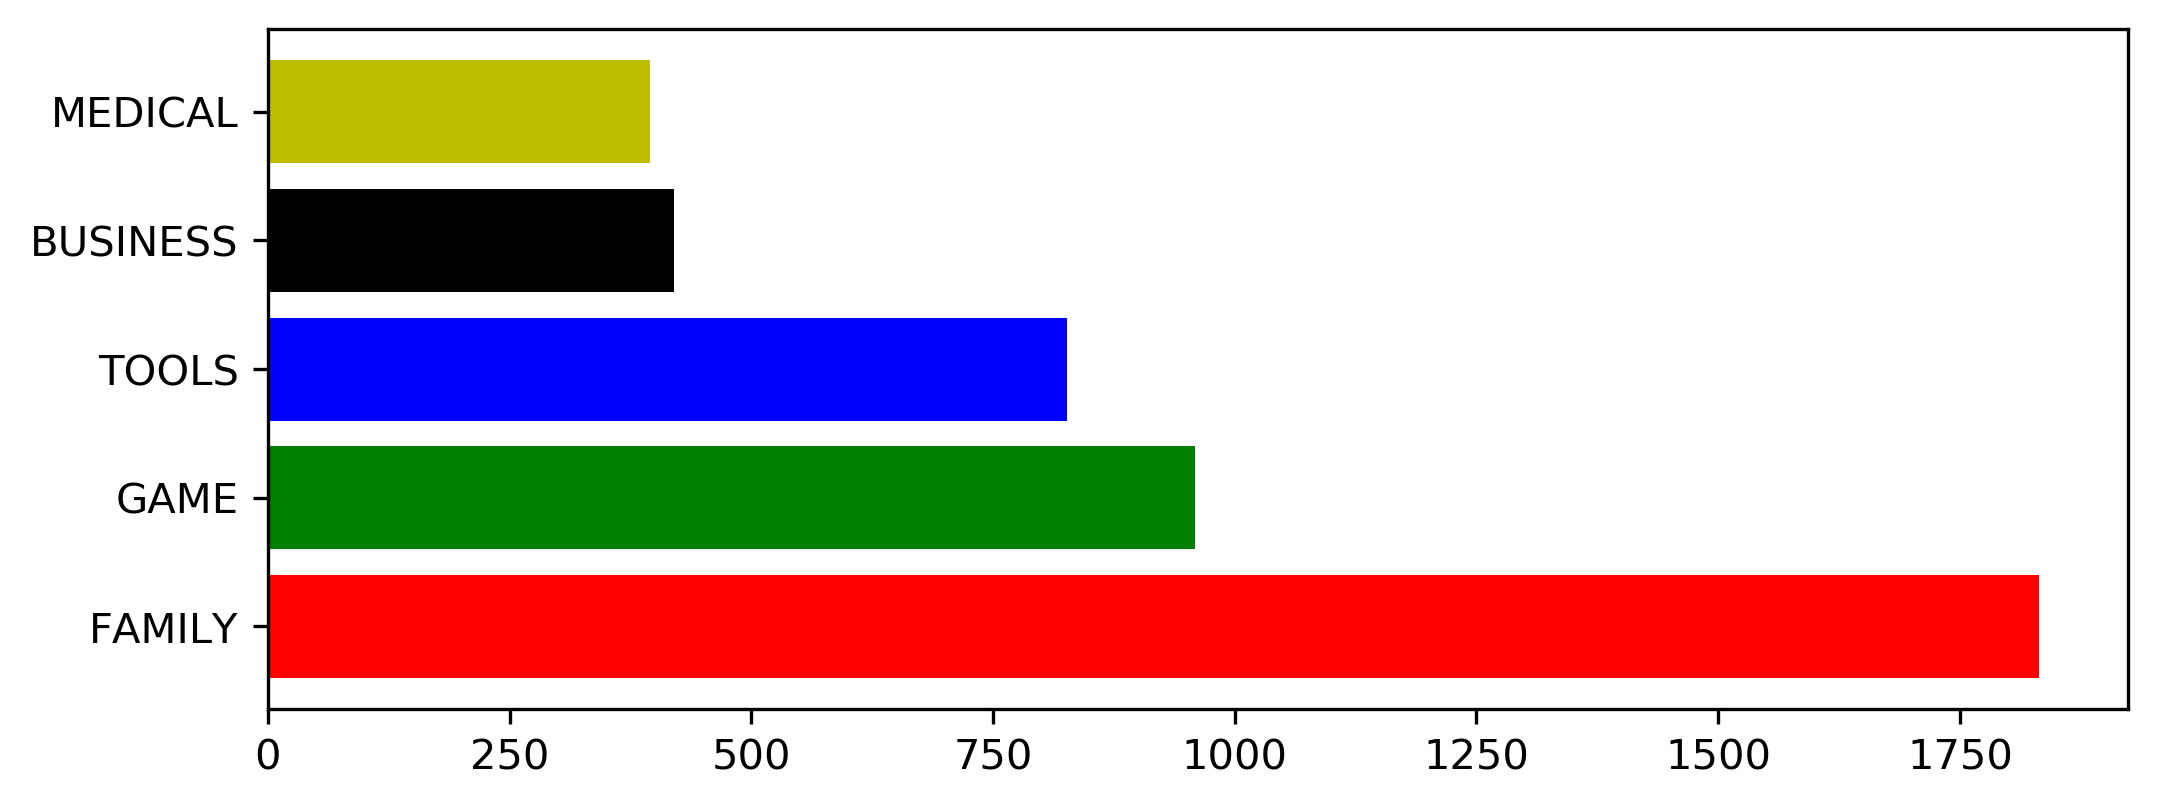

In [25]:
X = cat_order.index
Y = cat_order.Total
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh(X,Y, color=my_colors)

In [26]:
plt.savefig('cat_order.png',bbox_inches="tight") 

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Rating')

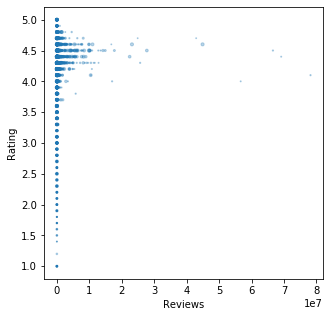

In [27]:
    X = df2["Reviews"].values # axis x
    Y = df2["Rating"].values # axis y
    area = playstore["Size"].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    # isi nama method untuk scatter plot, variabel x, dan variabel y
    plt.scatter(x=X,y=Y, s=area, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')

Text(0, 0.5, 'Frequency')

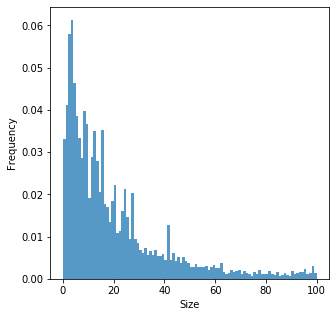

In [28]:
X=(playstore.Size/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')

In [29]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             9659 non-null   object  
 1   Category        9659 non-null   category
 2   Rating          8196 non-null   float64 
 3   Reviews         9659 non-null   int64   
 4   Size            9659 non-null   int64   
 5   Installs        9659 non-null   int64   
 6   Type            9658 non-null   object  
 7   Price           9659 non-null   float64 
 8   Content Rating  9659 non-null   object  
 9   Genres          9659 non-null   object  
 10  Last Updated    9659 non-null   object  
 11  Current Ver     9651 non-null   object  
 12  Android Ver     9657 non-null   object  
dtypes: category(1), float64(2), int64(3), object(7)
memory usage: 991.9+ KB


In [30]:
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

In [31]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   category      
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   int64         
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 991.9+ KB


In [32]:
playstore['year'] = playstore['Last Updated'].dt.year

In [33]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018


In [34]:
playstore.year.value_counts()

2018    6284
2017    1794
2016     779
2015     449
2014     203
2013     108
2012      26
2011      15
2010       1
Name: year, dtype: int64

In [39]:
year_5 = pd.crosstab(index=playstore.year, columns='Jumlah')[4:].reset_index()

In [40]:
year_5

col_0,year,Jumlah
0,2014,203
1,2015,449
2,2016,779
3,2017,1794
4,2018,6284


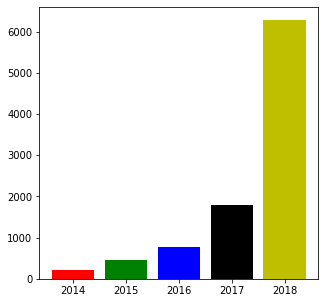

In [43]:
X = year_5.year
Y = year_5.Jumlah
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.bar(X,Y, color=my_colors)
plt.show()